# lambda 函数用法

In [2]:
import random

In [3]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|'))#.split()[0]

In [4]:
adj()

' 小小的'

In [5]:
def adj_star():
    return random.choice(["",adj()+adj_star()])#会死循环，每一次.choice

In [6]:
def adj_star_1():
    return random.choice([lambda :'',lambda : adj()+adj_star_1()])()

In [7]:
adj_star_1()

' 小小的'

# 02

# 城市坐标

In [9]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [10]:
import re

In [11]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [12]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.?\d+),\s(\d+.?\d+)\]")#r代表这是个正则表达，？表示有或者没有，\[:\斜杠表示转译,[在正则中有其他意思。\s？？

In [13]:
city_info = pattern.findall(test_string)
city_info

[('兰州', '103.73', '36.03')]

In [14]:
city_location = {}

In [15]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]##[0]别忘了
    
    long, lat = float(long), float(lat)#字符串转float数子
    
    city_location[city] = (long, lat)

In [16]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [17]:
import math

In [18]:
#根据经纬度计算直线距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)#radians() 方法将角度转换为弧度
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))#atan2() 返回给定的 X 及 Y 坐标值的反正切值;sqrt() 方法返回数字x的平方根
    d = radius * c

    return d

In [19]:
geo_distance((114.17, 22.28),(113.54, 22.19))

70.16960262636923

In [20]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [21]:
get_geo_distance("香港","澳门")

70.16960262636923

In [22]:
import networkx as nx

In [23]:
city_graph = nx.Graph()#创建一个nx.Graph对象

In [24]:
city_graph.add_nodes_from(list(city_location.keys()))#.keys() 方法会返回一个由一个给定对象的自身可枚举属性组成的数组

In [25]:
list(city_location.keys())

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '海口',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '台湾',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '西藏',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

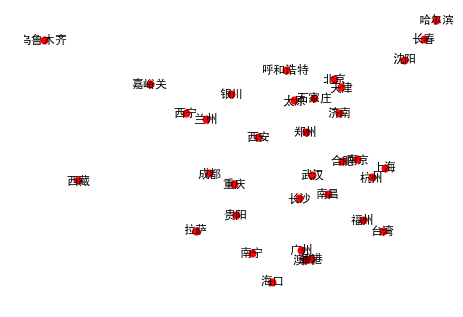

In [28]:
nx.draw(city_graph, city_location, with_labels=True, node_size=50)

In [29]:
from collections import defaultdict
city_connection = defaultdict(list)#defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值

In [30]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < 300:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [31]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [32]:
city_with_road = nx.Graph(city_connection)

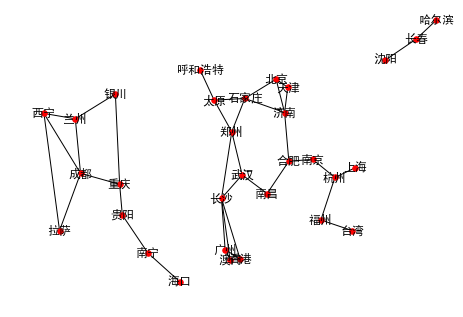

In [33]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

# 例子

In [34]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [35]:
simple_connection_info = defaultdict(list)

In [36]:
simple_connection_info.update(simple_connection_info_src)#update() 方法用于更新字典中的键/值对，可以修改存在的键对应的值，也可以添加新的键/值对到字典中。

In [37]:
simple_connection_info

defaultdict(list,
            {'北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '兰州': ['西安'],
             '郑州': ['太原'],
             '西安': ['兰州', '长沙'],
             '长沙': ['福州', '南宁'],
             '沈阳': ['北京']})

In [38]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()##set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等
    while visited:
        froninter = visited.pop() #用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值
        #print(froninter)
        if froninter in seen: continue
        for successor in graph[froninter]:
            if successor in seen: continue
            visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            #visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
        print(seen)
        seen.add(froninter)
    
    return seen

In [39]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [84]:
bfs(number_grpah, 3)

set()
{3}
{3, 5}
{3, 5, 7}
{8, 3, 5, 7}
{1, 3, 5, 7, 8}
{1, 2, 3, 5, 7, 8}
{1, 2, 3, 4, 5, 7, 8}


{1, 2, 3, 4, 5, 6, 7, 8}

In [41]:
simple_connection_info['西安']

['兰州', '长沙']

In [82]:
bfs(simple_connection_info, "西安")

set()
{'西安'}
{'长沙', '西安'}
{'长沙', '南宁', '西安'}
{'长沙', '南宁', '福州', '西安'}


{'兰州', '南宁', '福州', '西安', '长沙'}

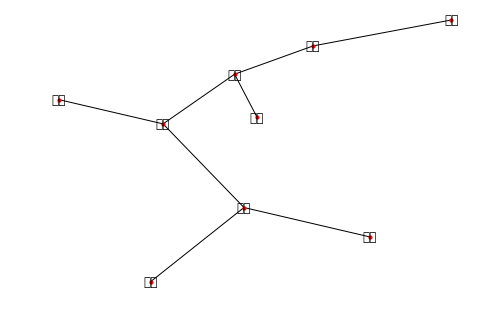

In [42]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

# 例子结束

In [32]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]##[[起始，目的地]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue#找到目的地
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop，找到起始
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        #print(pathes)

In [33]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [34]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [35]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i - 1], path[i])
        return distance

    return sorted(pathes, key=get_path_distnace)# key主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序

In [36]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [37]:
#pretty_print(search('北京', '福州', simple_connection_info))

In [40]:
pretty_print(search('香港', '太原', city_connection, sort_candidate=shortest_path_first))

香港🚗->长沙🚗->郑州🚗->太原


# 

# networkx不显示中文

In [6]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] ###加这两家显示中文
matplotlib.rcParams['font.family']='sans-serif'

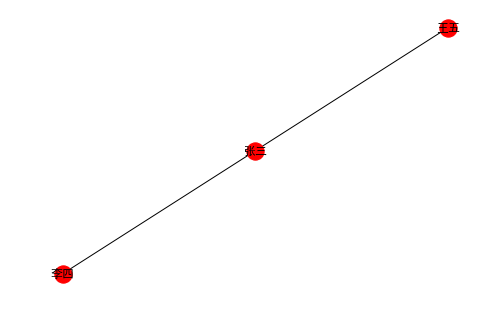

In [7]:
# coding = utf-8
from pylab import *
import networkx as nx
g=nx.Graph()
g.add_edge('张三','李四')
g.add_edge('张三','王五')
nx.draw(g,with_labels=True)
plt.show()

In [51]:
import matplotlib
print(matplotlib.__path__)

['D:\\Anaconda3\\lib\\site-packages\\matplotlib']


# 作业02 北京地铁换乘


# 爬虫

In [89]:
import requests

In [90]:
url = 'http://www.bjsubway.com/station/zjgls/'
response = requests.get(url)
response.encoding = 'GBK'
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

In [ ]:
#模拟浏览器
url = "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36'}
r = requests.get(url=url,headers = headers)
r.encoding = 'utf-8'
r.text

In [58]:
test_string = "<th>前门——崇文门</th>"
pattern = re.compile(r"<th>(\w+)——(\w+)</th>")
info = pattern.findall(test_string)
print(info)

[('前门', '崇文门')]


In [59]:
what_we_want = r'(\w+)——(\w+)'#正则专用符号. ? []

In [60]:
pattern = re.compile(what_we_want)

In [64]:
subway_station = pattern.findall(response.text)
subway_station

[('苹果园', '古城'),
 ('古城', '八角游乐园'),
 ('八角游乐园', '八宝山'),
 ('八宝山', '玉泉路'),
 ('玉泉路', '五棵松'),
 ('五棵松', '万寿路'),
 ('万寿路', '公主坟'),
 ('公主坟', '军事博物馆'),
 ('军事博物馆', '木樨地'),
 ('木樨地', '南礼士路'),
 ('南礼士路', '复兴门'),
 ('复兴门', '西单'),
 ('西单', '天安门西'),
 ('天安门西', '天安门东'),
 ('天安门东', '王府井'),
 ('王府井', '东单'),
 ('东单', '建国门'),
 ('建国门', '永安里'),
 ('永安里', '国贸'),
 ('国贸', '大望路'),
 ('大望路', '四惠'),
 ('四惠', '四惠东'),
 ('西直门', '车公庄'),
 ('车公庄', '阜成门'),
 ('阜成门', '复兴门'),
 ('复兴门', '长椿街'),
 ('长椿街', '宣武门'),
 ('宣武门', '和平门'),
 ('和平门', '前门'),
 ('前门', '崇文门'),
 ('崇文门', '北京站'),
 ('北京站', '建国门'),
 ('建国门', '朝阳门'),
 ('朝阳门', '东四十条'),
 ('东四十条', '东直门'),
 ('东直门', '雍和宫'),
 ('雍和宫', '安定门'),
 ('安定门', '鼓楼大街'),
 ('鼓楼大街', '积水潭'),
 ('积水潭', '西直门'),
 ('安河桥北', '北宫门'),
 ('北宫门', '西苑'),
 ('西苑', '圆明园'),
 ('圆明园', '北京大学东门'),
 ('北京大学东门', '中关村'),
 ('中关村', '海淀黄庄'),
 ('海淀黄庄', '人民大学'),
 ('人民大学', '魏公村'),
 ('魏公村', '国家图书馆'),
 ('国家图书馆', '动物园'),
 ('动物园', '西直门'),
 ('西直门', '新街口'),
 ('新街口', '平安里'),
 ('平安里', '西四'),
 ('西四', '灵境胡同'),
 ('灵境胡同', '西单'),
 ('西单', '宣武门'),
 ('宣武门', '菜市口'

In [79]:
subway_station_connection = defaultdict(list)
for s1 in subway_station:
    subway_station_connection[s1[0]].append(s1[1])
    subway_station_connection[s1[1]].append(s1[0])

In [80]:
subway_station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [81]:
subway_station_connection['王府井']

['天安门东', '东单']

# search

In [85]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]##[[起始，目的地]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue#找到目的地
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop，找到起始
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        #print(pathes)

In [86]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += 1#距离默认1
        return distance

    return sorted(pathes, key=get_path_distnace)# key主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序

In [88]:
pretty_print(search('五道口', '生命科学园', subway_station_connection, sort_candidate=shortest_path_first))

五道口🚗->上地🚗->西二旗🚗->生命科学园


# Machine Learning

In [1]:
from sklearn.datasets import load_boston#boston数据
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()

In [3]:
x = dataset["data"]

In [11]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [4]:
y = dataset["target"]

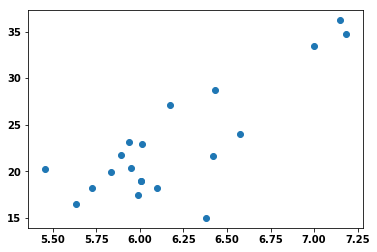

In [5]:
plt.scatter(x[0:20,5], y[0:20])

In [6]:
def draw_rm_and_price():
    plt.scatter(x[:,5], y)

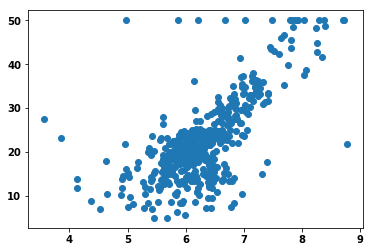

In [7]:
draw_rm_and_price()

In [8]:
room_num = x[:, 5]
price = y

In [9]:
import random
import numpy as np

In [10]:
def func(age, k, b): return k * age + b

In [11]:
def loss(y,yhat):#**2,平方
    return np.sum((y_i - yhat_i)**2 for y_i,yhat_i in zip(y,yhat))/len(list(y))#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [20]:
min_loss = float("inf")#
for i in  range(1000):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_by_random_k_and_b = [func(r,k,b) for r in room_num]
    #draw_rm_and_price()
    #plt.scatter(room_num,price_by_random_k_and_b)
    current_loss =loss(y,price_by_random_k_and_b)
    if current_loss < min_loss:
        best_k = k
        best_b = b
        min_loss = current_loss        
        print("best_k:{} best_b:{},and min_loss:{}".format(best_k,best_b,min_loss))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


best_k:-14 best_b:-81,and min_loss:36985.58037393672
best_k:-13 best_b:-73,and min_loss:31695.83895522332
best_k:11 best_b:26,and min_loss:5315.869803729247
best_k:5 best_b:21,and min_loss:945.3252375000001
best_k:-5 best_b:37,and min_loss:429.0877908596842
best_k:16 best_b:-81,and min_loss:75.91582615019774
best_k:9 best_b:-39,and min_loss:68.3174925039526
best_k:10 best_b:-44,and min_loss:57.58777213438735
best_k:14 best_b:-64,and min_loss:57.52850516205533


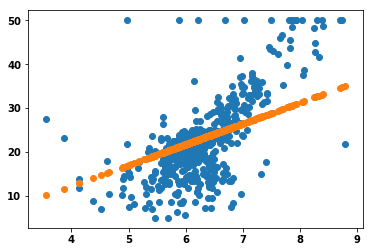

In [21]:
price_by_random_k_and_b = [func(r,4.746301430212446,-6.7024787369638705) for r in room_num]
draw_rm_and_price()
plt.scatter(room_num,price_by_random_k_and_b)

In [22]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [func(r, current_k, current_b) for r in room_num]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is : 0, get best_k: -32.63334413228208 best_b: 80.04013645705962, and the loss is: 22682.042801955467
When time is : 5, get best_k: -32.53334413228208 best_b: 79.94013645705962, and the loss is: 22522.23178136393
When time is : 6, get best_k: -32.43334413228208 best_b: 79.84013645705963, and the loss is: 22362.989161888865
When time is : 7, get best_k: -32.33334413228208 best_b: 79.74013645705963, and the loss is: 22204.31494353025
When time is : 8, get best_k: -32.23334413228208 best_b: 79.64013645705964, and the loss is: 22046.209126288155
When time is : 9, get best_k: -32.133344132282076 best_b: 79.54013645705965, and the loss is: 21888.671710162515
When time is : 10, get best_k: -32.033344132282075 best_b: 79.44013645705965, and the loss is: 21731.70269515339
When time is : 11, get best_k: -31.933344132282073 best_b: 79.34013645705966, and the loss is: 21575.302081260706
When time is : 12, get best_k: -31.833344132282072 best_b: 79.24013645705966, and the loss is: 21419.4

When time is : 243, get best_k: -8.733344132281873 best_b: 56.140136457060414, and the loss is: 653.1050344453643
When time is : 244, get best_k: -8.633344132281874 best_b: 56.04013645706041, and the loss is: 629.1418806930648
When time is : 245, get best_k: -8.533344132281874 best_b: 55.94013645706041, and the loss is: 605.7471280572478
When time is : 246, get best_k: -8.433344132281874 best_b: 55.84013645706041, and the loss is: 582.9207765379126
When time is : 247, get best_k: -8.333344132281875 best_b: 55.74013645706041, and the loss is: 560.6628261350597
When time is : 248, get best_k: -8.233344132281875 best_b: 55.64013645706041, and the loss is: 538.9732768486881
When time is : 249, get best_k: -8.133344132281875 best_b: 55.540136457060406, and the loss is: 517.8521286788008
When time is : 250, get best_k: -8.033344132281876 best_b: 55.440136457060404, and the loss is: 497.299381625395
When time is : 251, get best_k: -7.933344132281876 best_b: 55.3401364570604, and the loss is: 

# 导数

In [12]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [17]:
trying_times = 3000

min_loss = float('inf')

current_k = random.random() * 200 - 100#初始化研究
current_b = random.random() * 200 - 100

learning_rate = 0.001#学习率

for i in range(trying_times):
    
    price_by_k_and_b = [func(r, current_k, current_b) for r in room_num]#func()复杂函数拟合研究

    current_loss = loss(y, price_by_k_and_b)#loss()函数研究
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i %50 == 0 :
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k,  current_b, min_loss))
            
    current_k = current_k + (-1*partial_k(room_num, y, price_by_k_and_b))*learning_rate
    current_b = current_b + (-1*partial_b(room_num, y, price_by_k_and_b))*learning_rate 
                                                         

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is : 0, get best_k: -73.64563812181794 best_b: -70.1367058648236, and the loss is: 312003.45201660355
When time is : 50, get best_k: 11.344674101181951 best_b: -56.74881151804545, and the loss is: 109.83042700979895
When time is : 100, get best_k: 12.522487281341506 best_b: -56.53669935223602, and the loss is: 49.50167322046844
When time is : 150, get best_k: 12.53479353090392 best_b: -56.50784317398786, and the loss is: 49.47586381247858
When time is : 200, get best_k: 12.530896923350669 best_b: -56.48156651741683, and the loss is: 49.46174987096095
When time is : 250, get best_k: 12.526779883937678 best_b: -56.45535682537289, and the loss is: 49.4476720788931
When time is : 300, get best_k: 12.522664661298949 best_b: -56.42917912041676, and the loss is: 49.43362810018043
When time is : 350, get best_k: 12.518554340197692 best_b: -56.403032878827446, and the loss is: 49.41961785317291
When time is : 400, get best_k: 12.514448957671615 best_b: -56.37691805604844, and the loss